In [145]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [146]:
# importing data
df = pd.read_csv("https://raw.githubusercontent.com/zinduaschool/0305-credit-risk-modelling---classification-Lilian-Wamuhu/main/raw-data.csv?token=GHSAT0AAAAAAB7KAB6G3RO24PMFGZ6K7E36ZCKO65A")
df.head()

<ipython-input-146-4ef11f327bf2>:2: DtypeWarning: Columns (9,12,13,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("https://raw.githubusercontent.com/zinduaschool/0305-credit-risk-modelling---classification-Lilian-Wamuhu/main/raw-data.csv?token=GHSAT0AAAAAAB7KAB6G3RO24PMFGZ6K7E36ZCKO65A")


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32
0,1,0,0,24.0,0.0,2432.0,46500.0,24.0,1385.0,SC,...,NaN,NaN,46500.0,NaN,NaN,0,0,0,TIER 1,0
1,2,0,1,24.0,1.0,1495.0,28168.0,24.0,2496.0,MO,...,NaN,NaN,28168.0,NaN,NaN,0,0,0,TIER 1,0
2,3,0,0,26.0,0.0,1707.0,38900.0,30.0,1346.0,SC,...,NaN,105000.0,38900.0,34.0,31.0,31,31,16,TIER 1,0
3,4,0,0,24.0,0.0,2128.0,42900.0,24.0,1375.0,SC,...,NaN,NaN,42900.0,NaN,NaN,0,0,0,TIER 1,0
4,5,0,0,27.0,0.0,1824.0,40900.0,30.0,4140.0,MC,...,NaN,NaN,40900.0,NaN,NaN,0,0,0,TIER 1,0


In [147]:
df.duplicated().sum()

0

**Data Pre-processing**

In [148]:
#Renaming columns in the dataset with their correct names
loan = df.rename(columns={'V1': 'Customer ID',
'V2': 'Customer has bounced in first EMI', 
'V3': 'No of times bounced 12 months',
'V4': 'Maximum MOB',
'V5': 'No of times bounced while repaying the loan',
'V6': 'EMI',
'V7': 'Loan Amount',
'V8': 'Tenure',
'V9': 'Dealer codes from where customer has purchased the Two wheeler',
'V10': 'Product code of Two wheeler', 
'V11': 'No of advance EMI paid',
'V12': 'Rate of interest',
'V13': 'Gender',
'V14': 'Employment type',
'V15': 'Resident type of customer',
'V16': 'Date of birth',
'V17': 'Customer age when loan was taken',
'V18': 'No of loans',
'V19': 'No of secured loans',
'V20': 'No of unsecured loans',
'V21': 'Max amount sanctioned in the Live loans',
'V22': 'No of new loans in last 3 months',
'V23': 'Total sanctioned amount in the secured Loans which are Live',
'V24': 'Total sanctioned amount in the unsecured Loans which are Live',
'V25': 'Maximum amount sanctioned for any Two wheeler loan',
'V26': 'Time since last Personal loan taken (in months)',
'V27': 'Time since first consumer durables loan taken (in months)',
'V28': 'No of times 30 days past due in last 6 months',
'V29': 'No of times 60 days past due in last 6 months',
'V30': 'No of times 90 days past due in last 3 months',
'V31': 'Tier',
'V32': 'Target variable'})
loan.head()

,Customer ID,Customer has bounced in first EMI,No of times bounced 12 months,Maximum MOB,No of times bounced while repaying the loan,EMI,Loan Amount,Tenure,Dealer codes from where customer has purchased the Two wheeler,Product code of Two wheeler,...,Total sanctioned amount in the secured Loans which are Live,Total sanctioned amount in the unsecured Loans which are Live,Maximum amount sanctioned for any Two wheeler loan,Time since last Personal loan taken (in months),Time since first consumer durables loan taken (in months),No of times 30 days past due in last 6 months,No of times 60 days past due in last 6 months,No of times 90 days past due in last 3 months,Tier,Target variable
0,1,0,0,24.0,0.0,2432.0,46500.0,24.0,1385.0,SC,...,NaN,NaN,46500.0,NaN,NaN,0,0,0,TIER 1,0
1,2,0,1,24.0,1.0,1495.0,28168.0,24.0,2496.0,MO,...,NaN,NaN,28168.0,NaN,NaN,0,0,0,TIER 1,0
2,3,0,0,26.0,0.0,1707.0,38900.0,30.0,1346.0,SC,...,NaN,105000.0,38900.0,34.0,31.0,31,31,16,TIER 1,0
3,4,0,0,24.0,0.0,2128.0,42900.0,24.0,1375.0,SC,...,NaN,NaN,42900.0,NaN,NaN,0,0,0,TIER 1,0
4,5,0,0,27.0,0.0,1824.0,40900.0,30.0,4140.0,MC,...,NaN,NaN,40900.0,NaN,NaN,0,0,0,TIER 1,0


In [149]:
# Dimension of the dataset
loan.shape

(119528, 32)

In [150]:
# Checking the data
loan.dtypes

Customer ID                                                         int64
Customer has bounced in first EMI                                   int64
No of times bounced 12 months                                       int64
Maximum MOB                                                       float64
No of times bounced while repaying the loan                       float64
EMI                                                               float64
Loan Amount                                                       float64
Tenure                                                            float64
Dealer codes from where customer has purchased the Two wheeler    float64
Product code of Two wheeler                                        object
No of advance EMI paid                                            float64
Rate of interest                                                  float64
Gender                                                             object
Employment type                       

In [151]:
# Data distribution
loan.describe()

,Customer ID,Customer has bounced in first EMI,No of times bounced 12 months,Maximum MOB,No of times bounced while repaying the loan,EMI,Loan Amount,Tenure,Dealer codes from where customer has purchased the Two wheeler,No of advance EMI paid,...,No of new loans in last 3 months,Total sanctioned amount in the secured Loans which are Live,Total sanctioned amount in the unsecured Loans which are Live,Maximum amount sanctioned for any Two wheeler loan,Time since last Personal loan taken (in months),Time since first consumer durables loan taken (in months),No of times 30 days past due in last 6 months,No of times 60 days past due in last 6 months,No of times 90 days past due in last 3 months,Target variable
count,119528.000000,119528.000000,119528.000000,85048.000000,85048.000000,85048.000000,85048.000000,85048.000000,85048.000000,85048.000000,...,119528.0,1.928100e+04,1.902800e+04,104467.000000,13431.000000,20433.000000,119528.000000,119528.000000,119528.000000,119528.000000
mean,59764.500000,0.028378,0.473061,17.217148,0.690857,2325.701298,39338.081648,21.060048,3512.692233,0.643930,...,0.0,4.302522e+05,1.766494e+05,41415.210047,46.980940,48.208976,1.076877,0.823991,0.344898,0.021869
std,34504.905825,0.166052,0.859042,5.203209,1.091658,575.614365,11016.619745,5.698900,3754.675342,0.969123,...,0.0,8.228143e+05,4.075618e+05,13044.008078,42.716225,41.713826,3.737882,3.172612,1.478180,0.146258
min,1.000000,0.000000,0.000000,2.000000,0.000000,681.000000,10000.000000,6.000000,1001.000000,0.000000,...,0.0,9.900000e+01,1.000000e+00,10000.000000,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000
25%,29882.750000,0.000000,0.000000,14.000000,0.000000,1895.000000,30000.000000,18.000000,1368.000000,0.000000,...,0.0,4.490000e+04,3.394050e+04,31000.000000,20.000000,23.000000,0.000000,0.000000,0.000000,0.000000
50%,59764.500000,0.000000,0.000000,17.000000,0.000000,2320.000000,39700.000000,24.000000,2307.000000,0.000000,...,0.0,1.100000e+05,8.800000e+04,42250.000000,31.000000,35.000000,0.000000,0.000000,0.000000,0.000000
75%,89646.250000,0.000000,1.000000,21.000000,1.000000,2689.000000,48000.000000,24.000000,3911.000000,1.000000,...,0.0,4.920000e+05,2.000048e+05,49300.000000,52.000000,55.000000,0.000000,0.000000,0.000000,0.000000
max,119528.000000,1.000000,12.000000,36.000000,29.000000,7840.000000,96000.000000,36.000000,21106.000000,6.000000,...,0.0,2.022777e+07,3.000000e+07,700000.000000,252.000000,268.000000,314.000000,243.000000,96.000000,1.000000


In [152]:
# Data information
# As illustrated there are quite a number of features with missing values.
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119528 entries, 0 to 119527
Data columns (total 32 columns):
 #   Column                                                          Non-Null Count   Dtype  
---  ------                                                          --------------   -----  
 0   Customer ID                                                     119528 non-null  int64  
 1   Customer has bounced in first EMI                               119528 non-null  int64  
 2   No of times bounced 12 months                                   119528 non-null  int64  
 3   Maximum MOB                                                     85048 non-null   float64
 4   No of times bounced while repaying the loan                     85048 non-null   float64
 5   EMI                                                             85048 non-null   float64
 6   Loan Amount                                                     85048 non-null   float64
 7   Tenure                                

**Handling missing values**

In [153]:
#Checking the distribution of the categorical data

categorical=loan.select_dtypes(include=[np.object])
categorical.head()

<ipython-input-153-5b81e3354bd7>:3: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical=loan.select_dtypes(include=[np.object])


,Product code of Two wheeler,Gender,Employment type,Resident type of customer,Date of birth,Tier
0,SC,FEMALE,HOUSEWIFE,OWNED,30-05-1974,TIER 1
1,MO,MALE,SELF,RENT,01-09-1967,TIER 1
2,SC,MALE,SELF,RENT,04-05-1983,TIER 1
3,SC,FEMALE,SAL,RENT,10-12-1989,TIER 1
4,MC,MALE,SAL,RENT,24-09-1984,TIER 1


In [154]:
missing_data = loan.isnull().sum().sort_values(ascending = False)
missing_data.head(20)
     


Time since last Personal loan taken (in months)                   106097
Total sanctioned amount in the unsecured Loans which are Live     100500
Total sanctioned amount in the secured Loans which are Live       100247
Time since first consumer durables loan taken (in months)          99095
Max amount sanctioned in the Live loans                            82902
Resident type of customer                                          35397
No of advance EMI paid                                             34480
Date of birth                                                      34480
Employment type                                                    34480
Rate of interest                                                   34480
Customer age when loan was taken                                   34480
Product code of Two wheeler                                        34480
Dealer codes from where customer has purchased the Two wheeler     34480
Tenure                                             

In [155]:
loan.dropna(axis=0,how='any',subset=['Loan Amount','Gender','Resident type of customer'],inplace=True)
missing_data = loan.isnull().sum().sort_values(ascending = False)


In [156]:
dropped=['Time since first consumer durables loan taken (in months)','Time since last Personal loan taken (in months)',
'Max amount sanctioned in the Live loans','Total sanctioned amount in the secured Loans which are Live',
'Total sanctioned amount in the unsecured Loans which are Live','Maximum amount sanctioned for any Two wheeler loan']

loan.drop(dropped,axis=1,inplace=True)

In [157]:
loan.shape

(84131, 26)

**Correlation matrix**

<ipython-input-158-064ce85f0b8c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = loan.corr()


<Axes: >

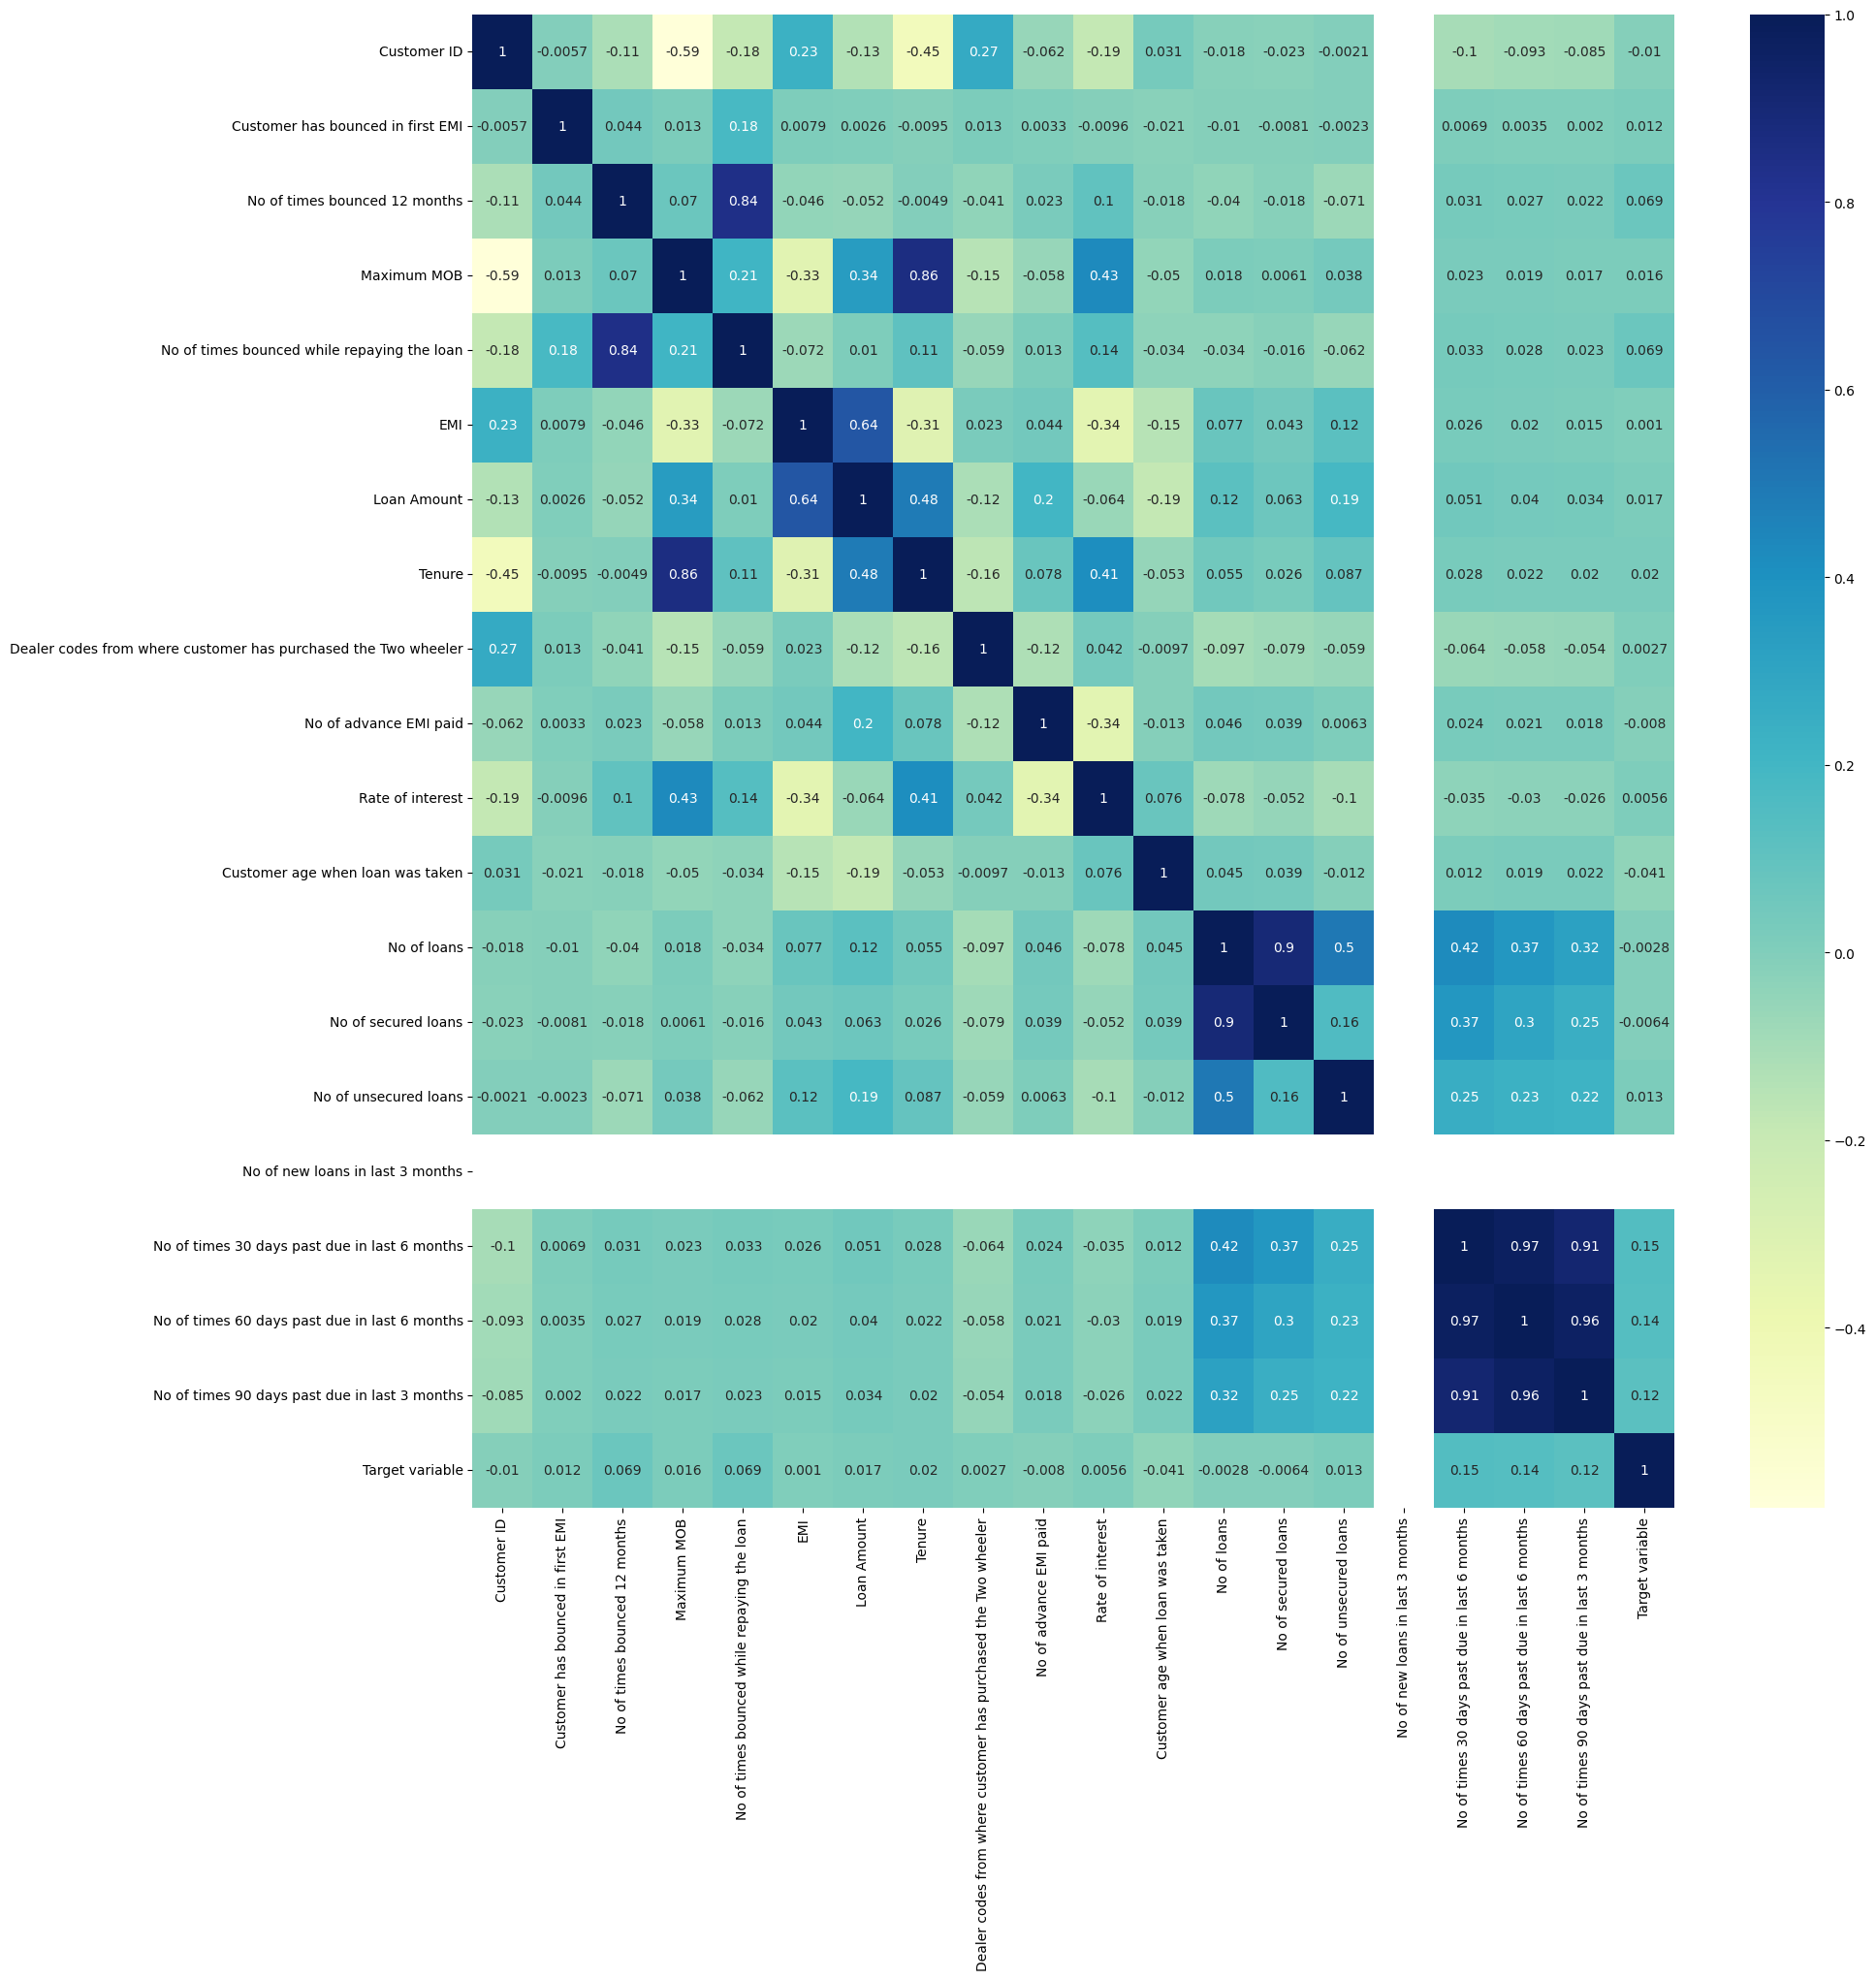

In [158]:
corr_matrix = loan.corr()
top_corr_features = corr_matrix.index
plt.figure(figsize=(20,20))
sns.heatmap(loan[top_corr_features].corr(),annot=True,cmap="YlGnBu")


**Gender ration**

In [159]:
gender_counts = loan['Gender'].value_counts()

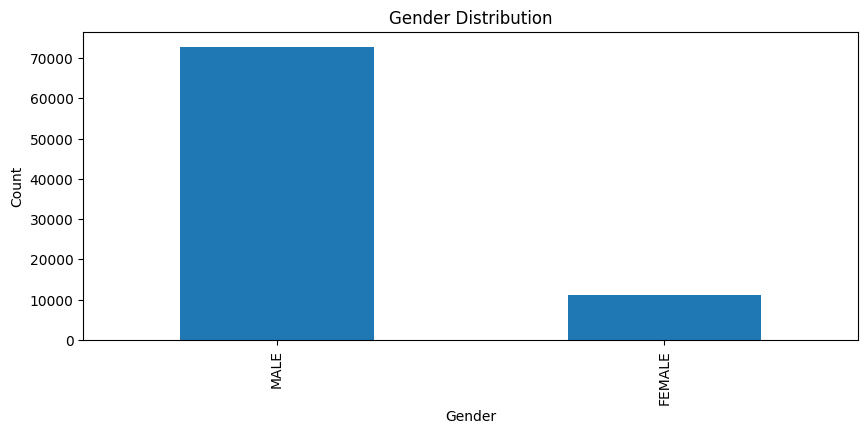

In [160]:
# Plotting the bar graph
gender_counts.plot(kind='bar',figsize = (10,4))
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')
plt.show()


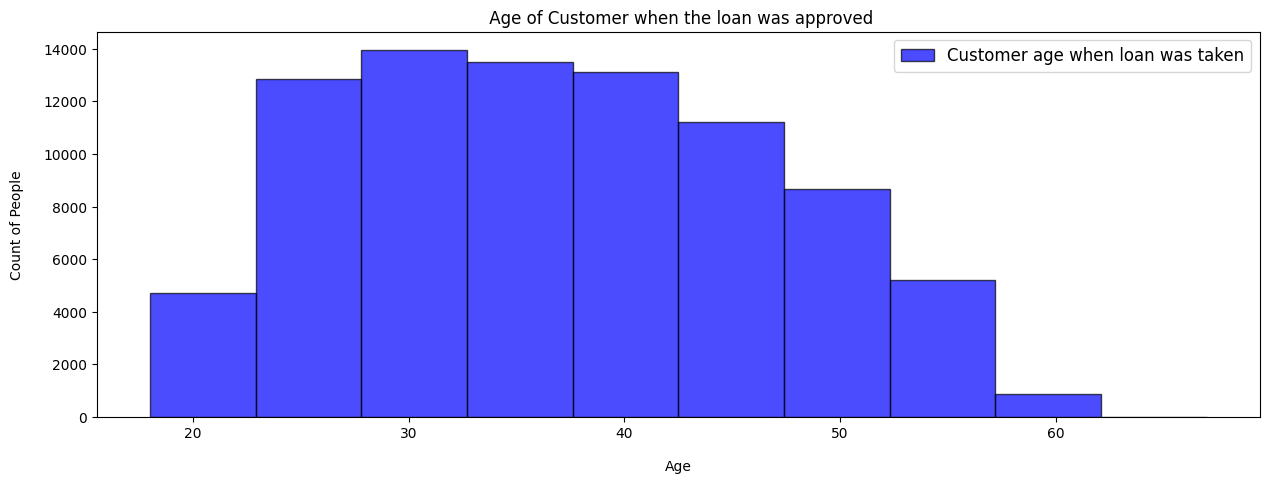

In [161]:
# Plotting against age at which customers took loans
plt.figure(figsize=(15,5))

#bar plot
loan['Customer age when loan was taken'].plot(kind='hist',color='b',alpha=0.7, edgecolor='black')
plt.xlabel("Age", labelpad=14)
plt.ylabel("Count of People", labelpad=14)
plt.title(" Age of Customer when the loan was approved")
plt.legend(loc="best",prop={"size":12})

From the histogram, we can see that the majority of customers took out loans in their mid-20s to mid-50s, with the peak around age 30. The number of customers taking out loans then decreases as age increases, with a relatively small number of customers taking out loans beyond age 60.



**One Hot Encoding**

using one hot encoding because our data consists of categorical variables

In [162]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [163]:
CatVariables = loan.select_dtypes(include=['object'])
for feature in CatVariables:
    loan[feature] = le.fit_transform(loan[feature].astype(str))


**Detecting Outliers**

**Data train and split**

In [ ]:
loan.columns

In [168]:
# Spliting target variable and independent variables
X=loan.drop(['Customer ID','Target variable'],axis=1)
y=loan[["Target variable"]]

In [169]:
print(len(X), len(y))


84131 84131


In [171]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 10)

from sklearn.ensemble import RandomForestClassifier 
model = RandomForestClassifier(max_depth=4,min_samples_leaf=3, random_state = 10) 
model.fit(x_train, y_train)

from sklearn.metrics import accuracy_score
yhat = model.predict(x_test)
print(f'Your train accuracy is: {accuracy_score(y_test,yhat)}')

pred_train = model.predict(x_train)
print(f'Your prediction is: {accuracy_score(y_train,pred_train)}')

<ipython-input-171-bcc4eaf5f303>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)


Your train accuracy is: 0.9769017432646593
Your prediction is: 0.9786385016386205


**Classification**

**1. Logistic Regression**

In [174]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
X, y = load_iris(return_X_y=True)
clf = LogisticRegression(random_state=0).fit(X, y)
clf.predict(X[:2, :])


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0, 0])

In [175]:
clf.predict_proba(X[:2, :])


array([[9.81799409e-01, 1.82005762e-02, 1.43509289e-08],
       [9.71722782e-01, 2.82771875e-02, 3.00214335e-08]])

In [176]:
clf.score(X, y)

0.9733333333333334

In [177]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: ignored